<a href="https://colab.research.google.com/github/Amine-dd/Generative-Deep-Learning/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#the simplest autoencoder
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
#the input of the placeholder
input_img = Input(shape=(784,))
#the encoded version of the input
encoded = Dense(encoding_dim,activation='relu')(input_img)
#the decoded version of the encoded
decoded = Dense(784,activation='sigmoid')(encoded)
#the autoencoder
autoencoder = Model(input_img,decoded)

In [0]:
#encoder model

encoder = Model(input_img,encoded)

In [0]:
#decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
#create the decoder
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3585 - val_loss: 0.2710
Epoch 2/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.2635 - val_loss: 0.2525
Epoch 3/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.2423 - val_loss: 0.2302
Epoch 4/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.2220 - val_loss: 0.2116
Epoch 5/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2062 - val_loss: 0.1984
Epoch 6/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1949 - val_loss: 0.1888
Epoch 7/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1864 - val_loss: 0.1812
Epoch 8/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1793 - val_loss: 0.1746
Epoch 9/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1730 - val_loss: 0.1687
Epoch

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

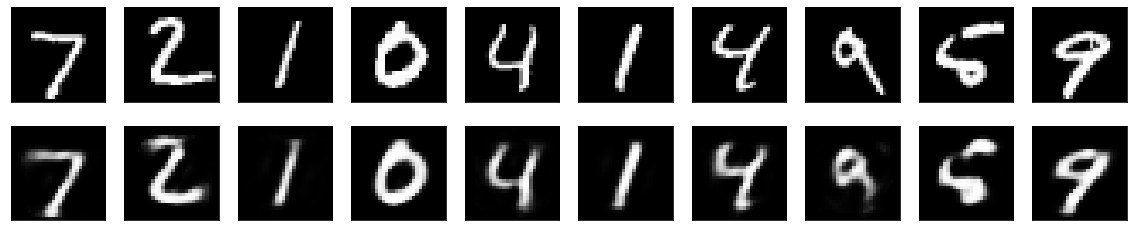

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
#adding a sparsity constraint
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [0]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.6727 - val_loss: 0.6485
Epoch 2/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.4531 - val_loss: 0.4457
Epoch

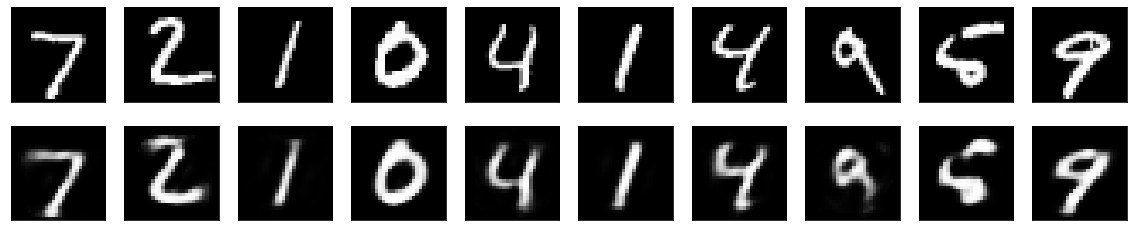

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
#Deep autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64,activation='relu')(encoded)
encoded = Dense(32,activation='relu')(encoded)

decoded = Dense(64,activation='relu')(encoded)
decoded = Dense(128,activation='relu')(decoded)
decoded = Dense(784,activation='sigmoid')(decoded)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.3311 - val_loss: 0.2617
Epoch 2/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.2515 - val_loss: 0.2443
Epoch 3/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.2332 - val_loss: 0.2227
Epoch 4/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.2160 - val_loss: 0.2084
Epoch 5/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.2037 - val_loss: 0.1979
Epoch 6/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1946 - val_loss: 0.1879
Epoch 7/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.1987 - val_loss: 0.2304
Epoch 8/100
60000/60000 [==============================] - 5s 85us/step - loss: 2.5708 - val_loss: 2.4150
Epoch 9/100
60000/60000 [==============================] - 5s 85us/step - loss: 2.1623 - val_loss: 1.7

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

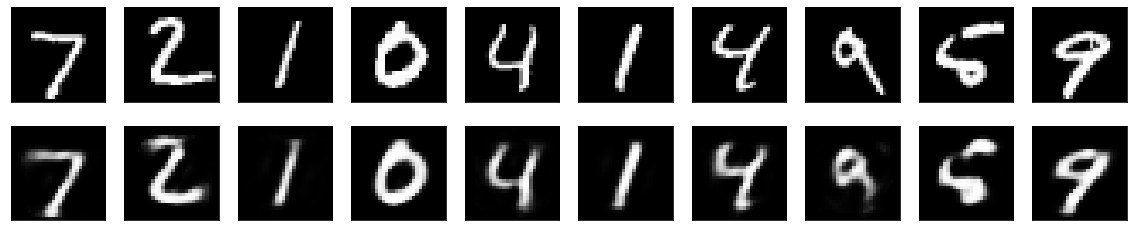

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples


Epoch 1/50
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2408 - val_loss: 0.2000

Epoch 2/50
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1873 - val_loss: 0.1709
Epoch 3/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1760 - val_loss: 0.1706
Epoch 4/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1693 - val_loss: 0.1599
Epoch 5/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1655 - val_loss: 0.1494
Epoch 6/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1629 - val_loss: 0.1591
Epoch 7/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1617 - val_loss: 0.1562
Epoch 8/50
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1624 - val_loss: 0.1717
Epoch 9/50
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1594 - val_loss: 0.1463
Ep